In [1]:
from google.colab.files import upload
upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mckorob","key":"9dae6fda7d9df67998e29b8f3cbbaf35"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d mkechinov/ecommerce-events-history-in-cosmetics-shop

Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop
License(s): copyright-authors
 84% 363M/430M [00:00<00:00, 605MB/s]
100% 430M/430M [00:00<00:00, 531MB/s]


In [4]:
!unzip ecommerce-events-history-in-cosmetics-shop.zip

Archive:  ecommerce-events-history-in-cosmetics-shop.zip
  inflating: 2019-Dec.csv            
  inflating: 2019-Nov.csv            
  inflating: 2019-Oct.csv            
  inflating: 2020-Feb.csv            
  inflating: 2020-Jan.csv            


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
# подключаем библиотеки
plt.style.use('ggplot')

In [ ]:
df = pd.concat([pd.read_csv(i) for i in ['2019-Dec.csv', '2019-Nov.csv', '2019-Oct.csv', '2020-Feb.csv', '2020-Jan.csv']], axis = 0)

In [ ]:
df['event_time'] = pd.to_datetime(df['event_time']) # приводим даты в универсальный формат

In [ ]:
df = df.sort_values(by='event_time') # сортируем

In [ ]:
display(df)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
4156677,2020-02-29 23:59:32+00:00,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10
4156678,2020-02-29 23:59:39+00:00,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f
4156679,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
4156680,2020-02-29 23:59:54+00:00,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


Считаем DAU, WAU, MAU

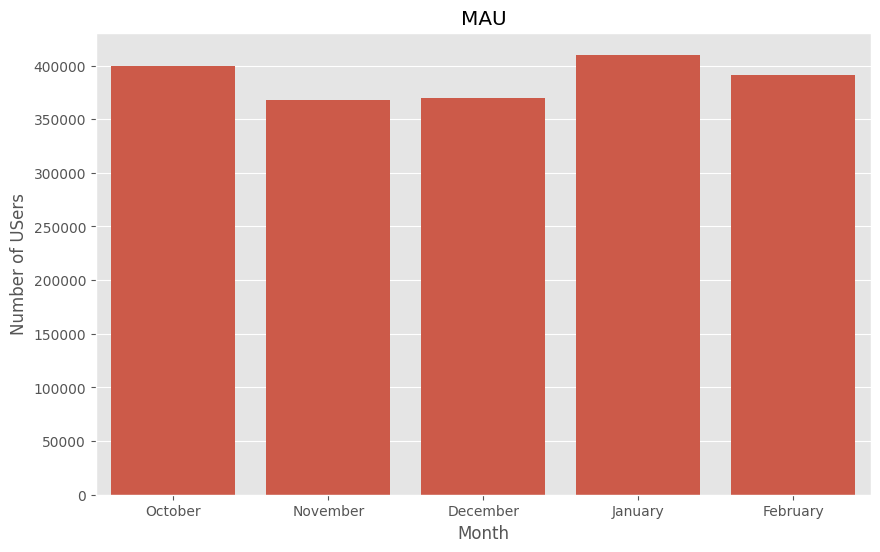

In [ ]:
mau = (df.groupby(by=df['event_time'].dt.month_name())['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'unique_users', 'event_time':'month'})
    .sort_values(by = 'month', key=lambda x: pd.Series('ONDJF'.index(i[0]) for i in x.tolist())) # чтобы месяцы шли по порядку
)
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='unique_users', data=mau)
plt.title('MAU')
plt.xlabel('Month')
plt.ylabel('Number of USers')
plt.show()



,day,unique_users
0,2019-10-01,19230
1,2019-10-02,33859
2,2019-10-03,16323
3,2019-10-04,14732
4,2019-10-05,14990
...,...,...
147,2020-02-25,20300
148,2020-02-26,20265
149,2020-02-27,20758
150,2020-02-28,19164


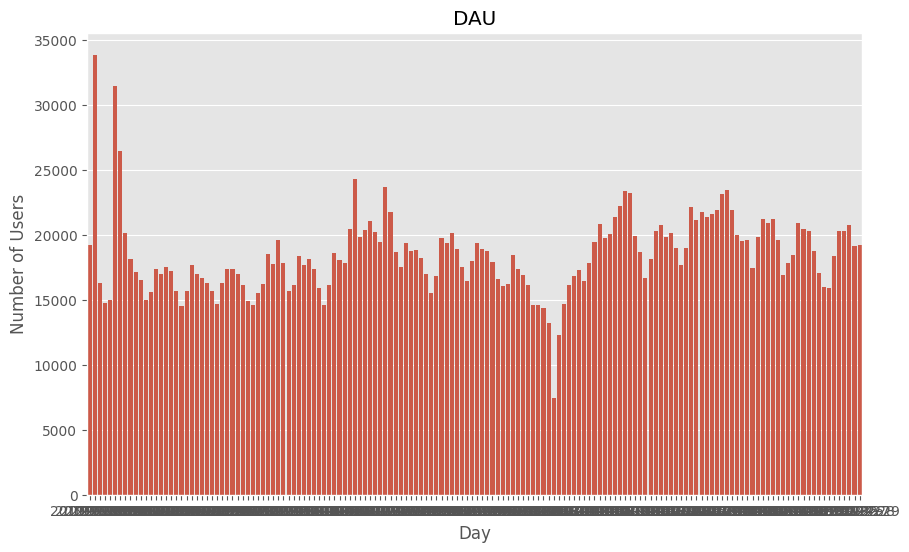

In [ ]:
dau = (df.groupby(by=df['event_time'].dt.date)['user_id']
       .nunique()
       .reset_index()
       .rename(columns={'event_time': 'day', 'user_id':'unique_users'})
       )
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='unique_users', data=dau)
plt.title('DAU')
plt.xlabel('Day')
plt.ylabel('Number of Users')
plt.show()

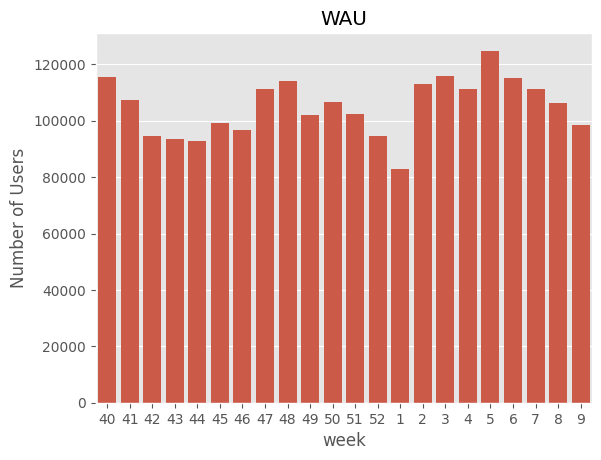

In [ ]:
wau = (df.groupby(by=(df['event_time'].dt.isocalendar().year.astype(str) + '-W' + df['event_time'].dt.isocalendar().week.astype(str)))['user_id']
       .nunique()
       .reset_index()
       .rename(columns={'index':'week', 'user_id': 'unique_users'}))
wau['week'] = wau['week'].str.split('-W').str[1]
sns.barplot(x='week', y='unique_users', data=wau)
plt.title('WAU')
plt.xlabel('week')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
steps = ['view', 'cart', 'purchase']
df['day'] = df['event_time'].dt.date
conv_table = (df[df['event_type'].isin(steps)]
              .groupby(['day', 'event_type'])['user_id']
              .nunique()
              .unstack(fill_value = 0)
              .reset_index()
              .rename(columns={'event_type': ''})
              )
conv_table['view->purchase%'] = conv_table['purchase']/conv_table['view'] * 100
display(conv_table)

event_type,day,cart,purchase,view,view->purchase%
0,2019-10-01,7676,1001,18392,5.442584
1,2019-10-02,22133,1045,32954,3.171087
2,2019-10-03,4804,1048,15468,6.775278
3,2019-10-04,3891,892,13932,6.402527
4,2019-10-05,4617,708,14320,4.944134
...,...,...,...,...,...
147,2020-02-25,5068,1105,19315,5.720942
148,2020-02-26,4918,1097,19274,5.691605
149,2020-02-27,4960,1129,19796,5.703172
150,2020-02-28,4568,1000,18278,5.471058


Когортный анализ

In [ ]:
cohort_date = (df.groupby('user_id')['day'].min().reset_index())

In [ ]:
cohort_date.rename(columns={'day': 'cohort_date'}, inplace = True)
df = df.merge(cohort_date, on='user_id')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,cohort_date,days_since
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,2019-10-01,0:00:00
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,2019-10-01,0:00:00
2,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,2019-10-01,0:00:00
3,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01,2019-10-01,0:00:00
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01,2019-10-01,0:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
20692835,2020-02-29 23:59:32+00:00,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,2020-02-29,2020-02-29,0:00:00
20692836,2020-02-29 23:59:39+00:00,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,2020-02-29,2019-10-14,"138 days, 0:00:00"
20692837,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,2020-02-29,2020-02-29,0:00:00
20692838,2020-02-29 23:59:54+00:00,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,2020-02-29,2020-02-24,"5 days, 0:00:00"


In [ ]:
df['days_since'] = (pd.to_datetime(df['day']) - pd.to_datetime(df['cohort_date'])).dt.days
display(df)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,day,cohort_date,days_since
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,2019-10-01,0
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,2019-10-01,0
2,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,2019-10-01,0
3,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01,2019-10-01,0
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01,2019-10-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20692835,2020-02-29 23:59:32+00:00,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,2020-02-29,2020-02-29,0
20692836,2020-02-29 23:59:39+00:00,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,2020-02-29,2019-10-14,138
20692837,2020-02-29 23:59:45+00:00,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,2020-02-29,2020-02-29,0
20692838,2020-02-29 23:59:54+00:00,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,2020-02-29,2020-02-24,5


In [ ]:
cohort_data = (
    df.groupby(['cohort_date', 'days_since'])['user_id']
    .nunique()
    .reset_index()
)
cohort_pivot = cohort_data.pivot_table(
    index='cohort_date',
    columns='days_since',
    values='user_id'
)
display(cohort_pivot)

days_since,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
cohort_date,,,,,,,,,,,,,,,,,,,,,
2019-10-01,19230.0,2120.0,1475.0,1232.0,926.0,946.0,1139.0,985.0,932.0,867.0,...,291.0,263.0,209.0,238.0,260.0,330.0,347.0,344.0,320.0,268.0
2019-10-02,31739.0,1492.0,881.0,639.0,621.0,754.0,700.0,711.0,647.0,569.0,...,185.0,161.0,153.0,194.0,221.0,240.0,232.0,201.0,160.0,NaN
2019-10-03,13356.0,1181.0,575.0,569.0,670.0,555.0,541.0,510.0,461.0,367.0,...,122.0,114.0,139.0,183.0,156.0,151.0,155.0,136.0,NaN,NaN
2019-10-04,11438.0,853.0,552.0,580.0,466.0,428.0,397.0,346.0,327.0,301.0,...,92.0,103.0,111.0,111.0,124.0,108.0,100.0,NaN,NaN,NaN
2019-10-05,11997.0,902.0,514.0,418.0,388.0,342.0,298.0,316.0,302.0,255.0,...,90.0,83.0,71.0,90.0,78.0,84.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25,10342.0,652.0,333.0,239.0,178.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26,10432.0,685.0,331.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,10398.0,605.0,247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def rank(series):
  n1 = np.quantile(series, 0.2)
  n2 = np.quantile(series, 0.4)
  n3 = np.quantile(series, 0.6)
  n4 = np.quantile(series, 0.8)
  return series.apply(lambda x: '1' if x <= n1 else ('2' if x <= n2 else ('3' if x <= n3 else ('4' if x <= n4 else '5'))))
rfm = (df[df['event_type'] == 'purchase'].groupby('user_id')
.agg(
    recency = ('day', 'max'),
    frequency = ('event_type', 'count'),
    monetary = ('price', 'sum')
))
rfm['RFM'] = rank(rfm['recency']) + rank(rfm['frequency']) + rank(rfm['monetary'])